In [2]:
library(tidyverse)
library(ggplot2)

In [3]:
brfss_table = read.table('../../Table/BRFSS/BRFSS_cleaned_master.tsv', 
    stringsAsFactors = F, sep = '\t', header = T)
head(brfss_table)
dim(brfss_table)

,mmsa,age,income,exercise,flushot,binging,heavy_drink,smoker,smoking_now,year,state,hpi
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,10740,1,3,1,NA,2,1,1,2,2003,NM,120.21
2,10740,1,2,1,NA,2,1,3,1,2003,NM,120.21
3,10740,1,4,1,NA,2,1,2,2,2003,NM,120.21
4,10740,1,5,1,NA,1,1,1,2,2003,NM,120.21
5,10740,1,3,1,NA,1,1,4,1,2003,NM,120.21
6,10740,1,2,1,NA,1,1,4,1,2003,NM,120.21


[1] 2574386      12

## For the second part, I will try to answer the question: are there any state-level policies that seem to correlate with the behavioral risks?

In [4]:
# I've processed two documents: state_policy_spending.tsv and state_policy_tax.tsv
state_spending = read.table('../../Table/state_policy_spending.tsv', stringsAsFactors = F, header = T, sep = '\t')
state_tax = read.table('../../Table/state_policy_tax.tsv', stringsAsFactors = F, header = T, sep = '\t')

In [5]:
dim(state_spending)
head(state_spending)
dim(state_tax)
head(state_tax)

[1] 867  41

,year,st,state,aairpi,aasstpi,aasstpia,acorrpi,adebtpi,adebtpia,aedpi,...,apkgpi,apolpi,apwpi,asanpi,atotpi,atotpib,atotpic,aunempi,autilpi,awtpi
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2003,AL,Alabama,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2003,AK,Alaska,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2003,AZ,Arizona,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2003,AR,Arkansas,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2003,CA,California,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2003,CO,Colorado,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 867  29

,year,st,state,fgastax1,w_environment_solar_taxcredit,fgastax1.1,cigtax,beer_tax,beer_tax_rank,spirit_tax,...,cwinetav,cwinetex,cspirp,cspirt,cspirtav,cspirtex,icigtaxraw,icigtax,iindex,z_cigarette_taxes
,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2003,AL,Alabama,0.160,0,0.160,1,NA,NA,NA,...,0.00,1.70,45.2,NA,0.519,0.00,NA,NA,NA,0.21
2,2003,AK,Alaska,0.080,0,0.080,0,NA,NA,NA,...,0.00,2.50,45.2,14.977600,0.000,12.80,NA,NA,NA,1.11
3,2003,AZ,Arizona,0.180,2,0.180,1,NA,NA,NA,...,0.00,0.84,45.2,3.510375,0.000,3.00,NA,NA,NA,1.40
4,2003,AR,Arkansas,0.215,0,0.215,1,NA,NA,NA,...,0.03,0.75,45.2,4.281313,0.030,2.50,NA,NA,NA,0.44
5,2003,CA,California,0.180,2,0.180,1,NA,NA,NA,...,0.00,0.20,45.2,3.861413,0.000,3.30,NA,NA,NA,0.92
6,2003,CO,Colorado,0.220,0,0.220,1,NA,NA,NA,...,0.00,0.32,45.2,2.667885,0.000,2.28,NA,NA,NA,0.22


## Question: is there a positive correlation between a state's spending on parks and recreation and exercise for people in the state?

In [9]:
# the matched columns in brfss_table is: year, state
# the matched columns in state_spending and state_tax is year, st
test_tbl = brfss_table %>% rename(st = state) %>% 
    left_join(state_spending[, c('year', 'st', 'aparkpi')]) %>%
    drop_na(aparkpi)

Joining, by = c("year", "st")



In [10]:
head(test_tbl)
dim(test_tbl)

,mmsa,age,income,exercise,flushot,binging,heavy_drink,smoker,smoking_now,year,st,hpi,aparkpi
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
129780,10420,1,1,1,NA,1,1,4,1,2004,OH,144.61,0.00285944
129781,10420,1,1,2,NA,2,1,1,2,2004,OH,144.61,0.00285944
129782,10420,1,2,1,NA,1,1,4,1,2004,OH,144.61,0.00285944
129783,10420,1,1,1,NA,1,1,4,1,2004,OH,144.61,0.00285944
129784,10420,1,2,1,NA,2,1,4,1,2004,OH,144.61,0.00285944
129785,10420,1,2,2,NA,1,1,1,2,2004,OH,144.61,0.00285944


[1] 1470191      13

In [11]:
# 1 - exercise
tbl = test_tbl %>% filter(exercise < 9)
summary(lm(exercise ~ aparkpi, data = tbl))
# 2- flushot
tbl = test_tbl %>% filter(flushot < 9)
summary(lm(flushot ~ aparkpi, data = tbl))
# 3 - binging
tbl = test_tbl %>% filter(binging < 9)
summary(lm(binging ~ aparkpi, data = tbl))
# 4 - heavy_drink
tbl = test_tbl %>% filter(heavy_drink < 9)
summary(lm(heavy_drink ~ aparkpi, data = tbl))
# 5 - smoker
tbl = test_tbl %>% filter(smoker < 9)
summary(lm(smoker ~ aparkpi, data = tbl))
# 6 - smoking_now
tbl = test_tbl %>% filter(smoking_now < 9)
summary(lm(smoking_now ~ aparkpi, data = tbl))


Call:
lm(formula = exercise ~ aparkpi, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2687 -0.2511 -0.2410 -0.1869  0.8144 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.283e+00  9.367e-04  1369.7   <2e-16 ***
aparkpi     -1.332e+01  2.979e-01   -44.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4294 on 1431036 degrees of freedom
Multiple R-squared:  0.001395,	Adjusted R-squared:  0.001394 
F-statistic:  1999 on 1 and 1431036 DF,  p-value: < 2.2e-16



Call:
lm(formula = flushot ~ aparkpi, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3511 -0.3430 -0.3365  0.6555  0.6861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.357536   0.001982 685.080   <2e-16 ***
aparkpi     -5.974766   0.643608  -9.283   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4738 on 396048 degrees of freedom
Multiple R-squared:  0.0002175,	Adjusted R-squared:  0.000215 
F-statistic: 86.18 on 1 and 396048 DF,  p-value: < 2.2e-16



Call:
lm(formula = binging ~ aparkpi, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1277 -0.1220 -0.1207 -0.1195  0.8814 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 1.1170809  0.0007179 1556.026  < 2e-16 ***
aparkpi     1.4499696  0.2284429    6.347 2.19e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3265 on 1414213 degrees of freedom
Multiple R-squared:  2.849e-05,	Adjusted R-squared:  2.778e-05 
F-statistic: 40.29 on 1 and 1414213 DF,  p-value: 2.194e-10



Call:
lm(formula = heavy_drink ~ aparkpi, data = tbl)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05272 -0.05159 -0.05131 -0.05110  0.94914 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.0505368  0.0004863 2160.34   <2e-16 ***
aparkpi     0.2985796  0.1547326    1.93   0.0537 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2208 on 1410689 degrees of freedom
Multiple R-squared:  2.64e-06,	Adjusted R-squared:  1.931e-06 
F-statistic: 3.724 on 1 and 1410689 DF,  p-value: 0.05365



Call:
lm(formula = smoker ~ aparkpi, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3202 -0.2725  0.7104  0.7361  0.7537 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.233556   0.002172 1488.99   <2e-16 ***
aparkpi     11.856046   0.691012   17.16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9971 on 1438065 degrees of freedom
Multiple R-squared:  0.0002047,	Adjusted R-squared:  0.000204 
F-statistic: 294.4 on 1 and 1438065 DF,  p-value: < 2.2e-16



Call:
lm(formula = smoking_now ~ aparkpi, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1663 -0.1640 -0.1631 -0.1601  0.8448 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.1681779  0.0008045 1452.056  < 2e-16 ***
aparkpi     -1.7736704  0.2559899   -6.929 4.25e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3694 on 1438065 degrees of freedom
Multiple R-squared:  3.338e-05,	Adjusted R-squared:  3.269e-05 
F-statistic: 48.01 on 1 and 1438065 DF,  p-value: 4.25e-12


parks and recreation spending (aparkpi) has a pretty convincing t-statistic of -44.7 with exercise, though it must be noted that this is a simple correlational study with no implication of causality, and more care needs to be taken in terms of covariates, etc.

Still, it is encouraging that we get something. Let's try to plot this to see it in action:

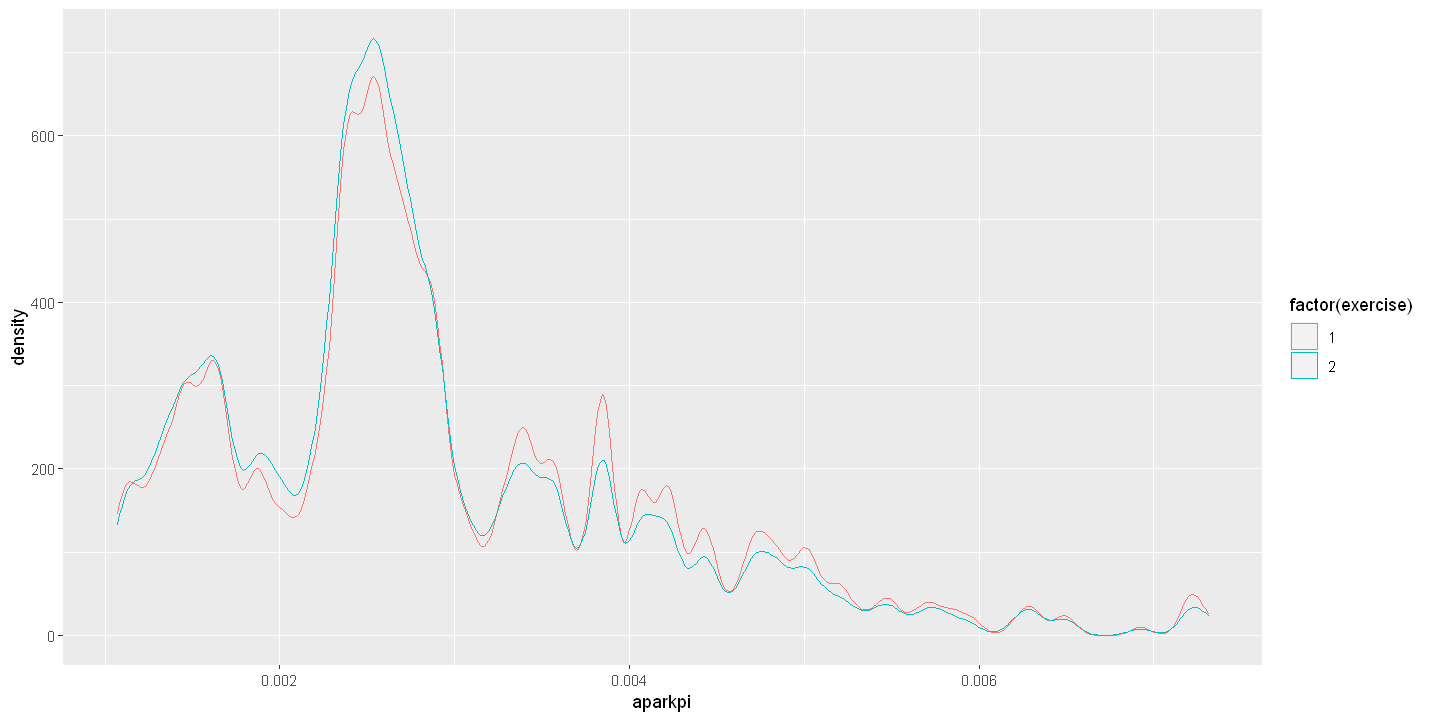

In [13]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(test_tbl %>% filter(exercise < 9), aes(x = aparkpi, color = factor(exercise))) + geom_density()

exercise value of 1 corresponds to people reporting having exercised, and for higher values of state spending, the density is higher. Meanwhile, for lower values of state spending, density of exercise value of 2 (no exercise) is higher.

### Conclusion: although this is just a correlational study with lots of room for improvement, there is initial evidence that state's spending on parks & rec has a positive correlation with exercise for people in the state

## Question: can we find a similar relationship between alcohol taxes and prevalence of binging and heavy drinkers?

In [28]:
# There are three types of alcohol taxes - beer, wine and spirits.
# For each type of alcohol, there are four tax variables. In the case of beer:
# 'cbeertex' - Beer excise tax rates
# 'cbeerp' - Net-of-tax beer price per gallon
# 'cbeert' - Beer taxes per gallon
# 'cbeertav' - Beer ad valorem tax rates
# The same applies for wine and spirits
alcol_tax_names = c('cbeertex', 'cbeerp', 'cbeert', 'cbeertav',
        'cwinetex', 'cwinep', 'cwinet', 'cwinetav',
        'cspirtex', 'cspirp', 'cspirt', 'cspirtav')

test_tbl = brfss_table %>% rename(st = state) %>% 
    left_join(state_tax[, c('year', 'st', alcol_tax_names)])
tbl = test_tbl %>% filter(binging < 9)

# generate formula text for binging
form_texts = sapply(alcol_tax_names, function(x) {paste('binging', '~', x)})
# conduct linear mapping
data_points = sapply(form_texts, function(x) {
    summary(lm(x, data = tbl))$coefficients[2, 3]
})

binge_tbl = data.frame(type = c(rep('beer', 4), rep('wine', 4), rep('spirit', 4)), 
    stat = data_points, tax_type = rep(c('excise', 'net', 'per_g', 'ad_valorem'), 3))

# generate formula text for heavy drinking
form_texts = sapply(alcol_tax_names, function(x) {paste('heavy_drink', '~', x)})
# conduct linear mapping
data_points = sapply(form_texts, function(x) {
    summary(lm(x, data = tbl))$coefficients[2, 3]
})

heavy_tbl_tbl = data.frame(type = c(rep('beer', 4), rep('wine', 4), rep('spirit', 4)), 
    stat = data_points, tax_type = rep(c('excise', 'net', 'per_g', 'ad_valorem'), 3))

binge_tbl
heavy_tbl

Joining, by = c("year", "st")



,type,stat,tax_type
,<fct>,<dbl>,<fct>
cbeertex,beer,-19.859197,excise
cbeerp,beer,-6.822646,net
cbeert,beer,-23.043938,per_g
cbeertav,beer,-12.301831,ad_valorem
cwinetex,wine,-5.261611,excise
cwinep,wine,-6.822646,net
cwinet,wine,-15.501061,per_g
cwinetav,wine,-13.289259,ad_valorem
cspirtex,spirit,-2.545096,excise


type,stat,tax_type
<fct>,<dbl>,<fct>
beer,-1.4509359,excise
beer,-10.1151764,net
beer,-4.7752300,per_g
beer,-6.1274857,ad_valorem
wine,7.2053408,excise
wine,-10.1151764,net
wine,-15.8275622,per_g
wine,-16.2206854,ad_valorem
spirit,6.5125153,excise


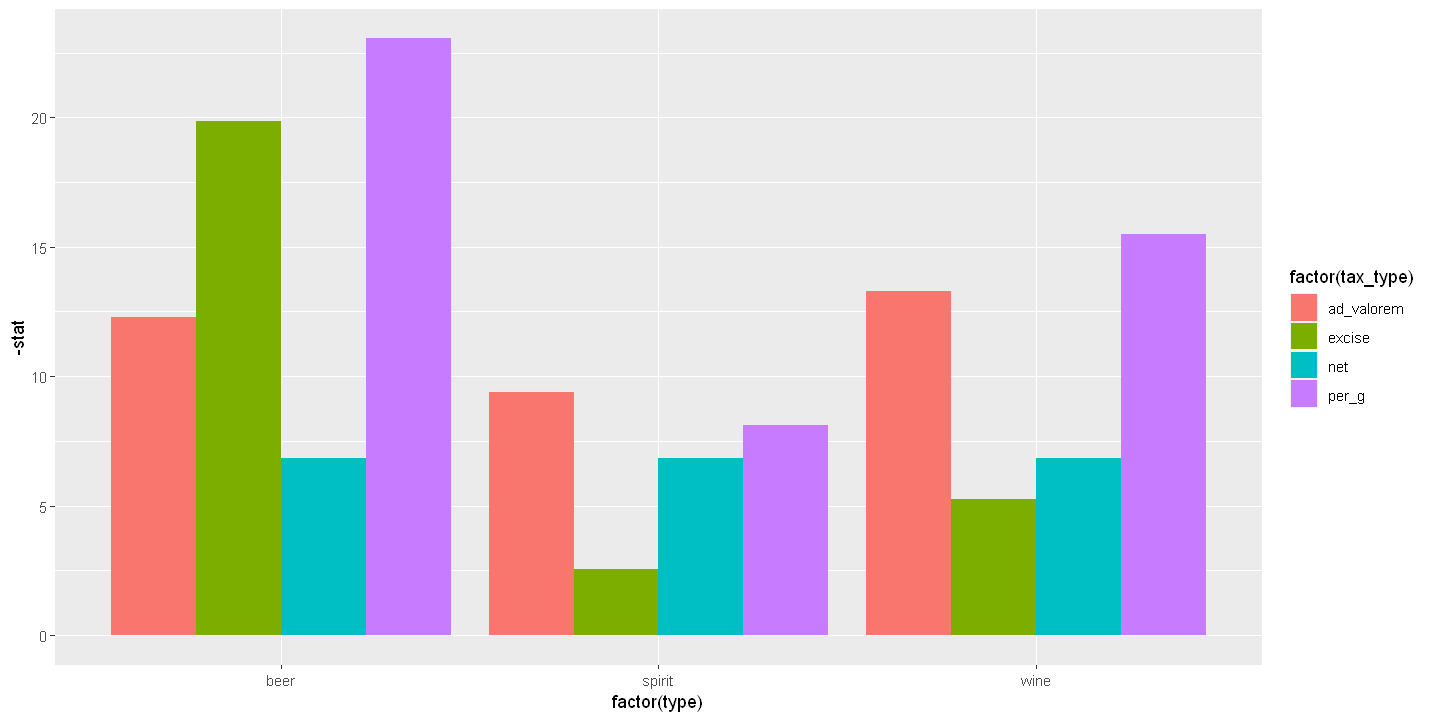

In [15]:
ggplot(binge_tbl, aes(x = factor(type), y = -stat, fill = factor(tax_type))) + 
    geom_bar(stat = 'identity', position = 'dodge')

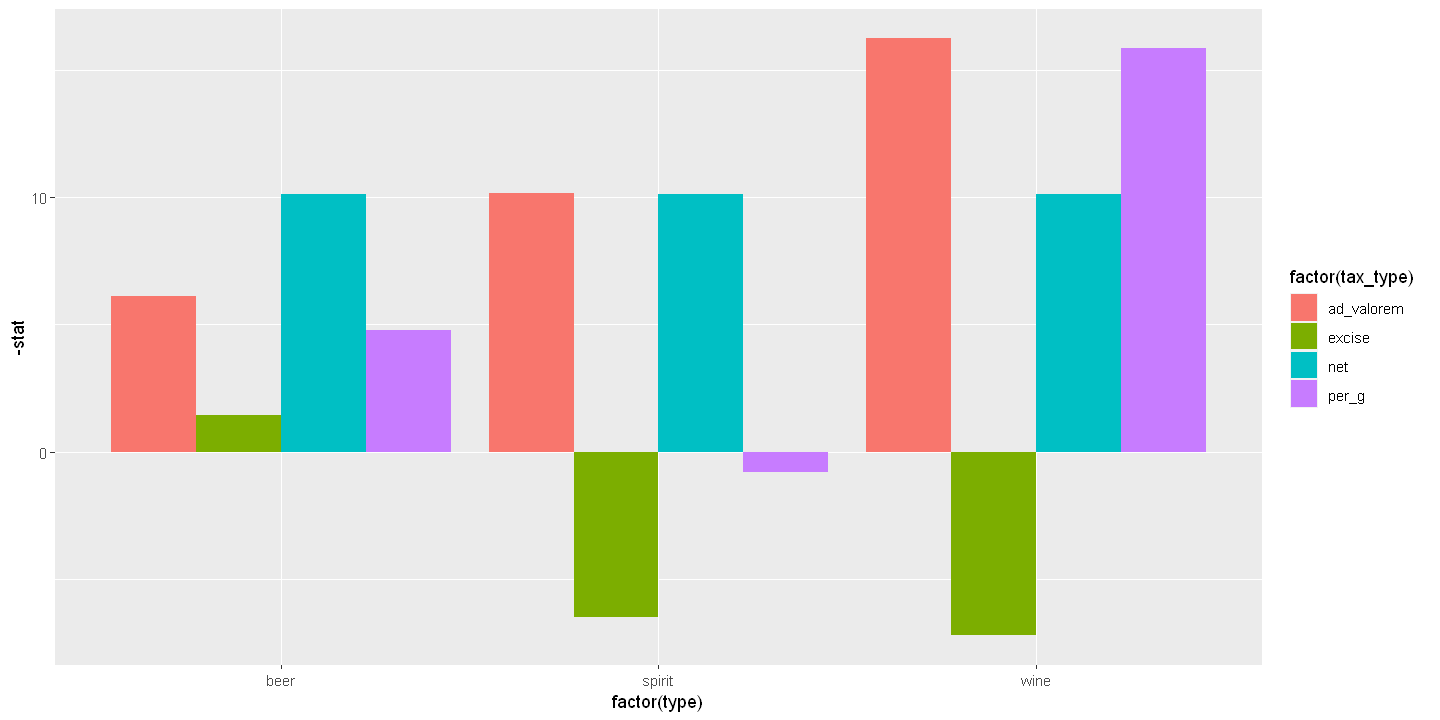

In [16]:
ggplot(heavy_tbl, aes(x = factor(type), y = -stat, fill = factor(tax_type))) + 
    geom_bar(stat = 'identity', position = 'dodge')

### Conclusion: in general, beer taxes have larger correlation with binge drinking, while wine taxes have larger correlation with heavy drinking. However, a better understanding of what 4 different types of taxes do (and which states implement them) is needed.

## Question: are there any interventions that appear to affect behavioral risk factors?

This question gets the closest to the stated goal of this project. In order to do this, we'll actually have to look at the time-series data and identify 'interventions' that occurred at state-level. Let's go back to the parks & rec spending.

Let's first identify states that had 'interventions': states that had a significant change in this field over the time we are studying

In [17]:
max_spend = state_spending %>% drop_na(aparkpi) %>% group_by(st) %>% summarize(max(aparkpi))
min_spend = state_spending %>% drop_na(aparkpi) %>% group_by(st) %>% summarize(min(aparkpi))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



In [18]:
combined = cbind(max_spend, min_spend)[, c(1, 2, 4)]
combined$diff = combined[,2] - combined[,3]
combined = combined %>% arrange(desc(diff))

In [19]:
head(combined, 10)

,st,max(aparkpi),min(aparkpi),diff
,<chr>,<dbl>,<dbl>,<dbl>
1,AZ,0.00629511,0.00235514,0.00393997
2,CO,0.00721305,0.00419727,0.00301578
3,AK,0.00573851,0.00283452,0.00290399
4,NV,0.00755669,0.00493620,0.00262049
5,NE,0.00472166,0.00241370,0.00230796
6,ND,0.00647063,0.00416624,0.00230439
7,IN,0.00383087,0.00153526,0.00229561
8,MN,0.00555489,0.00383617,0.00171872
9,MD,0.00421059,0.00249513,0.00171546


Looks like there was a pretty big change for Arizona - let's take a look at this in more detail:

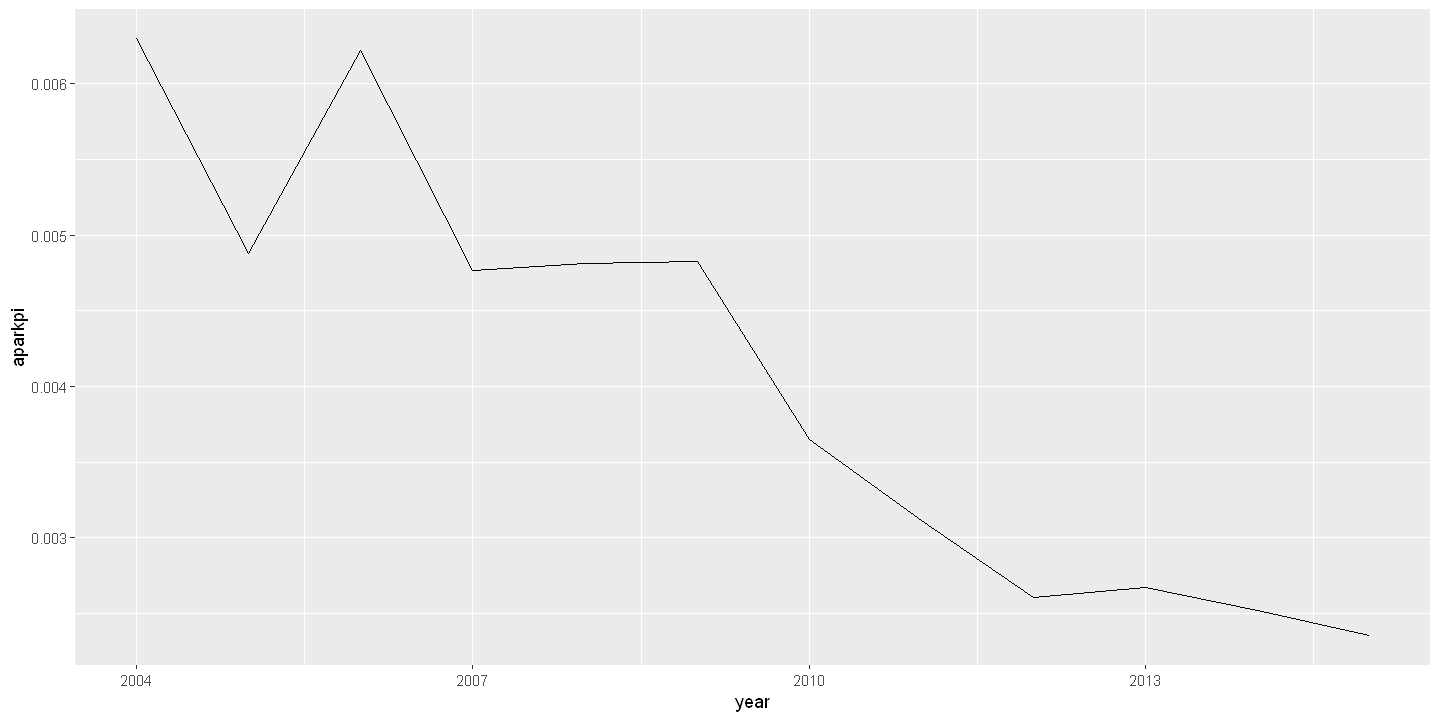

In [20]:
ggplot(state_spending %>% drop_na(aparkpi) %>% filter(st == 'AZ'), aes(x = year, y = aparkpi)) + geom_line()

Arizona had a pretty big cut in its parks & rec spending over this period. Unfortunately, this was a period of big economic downturn and it was hard to find states that actually raised this spending. North Dakota was one prominent exception:

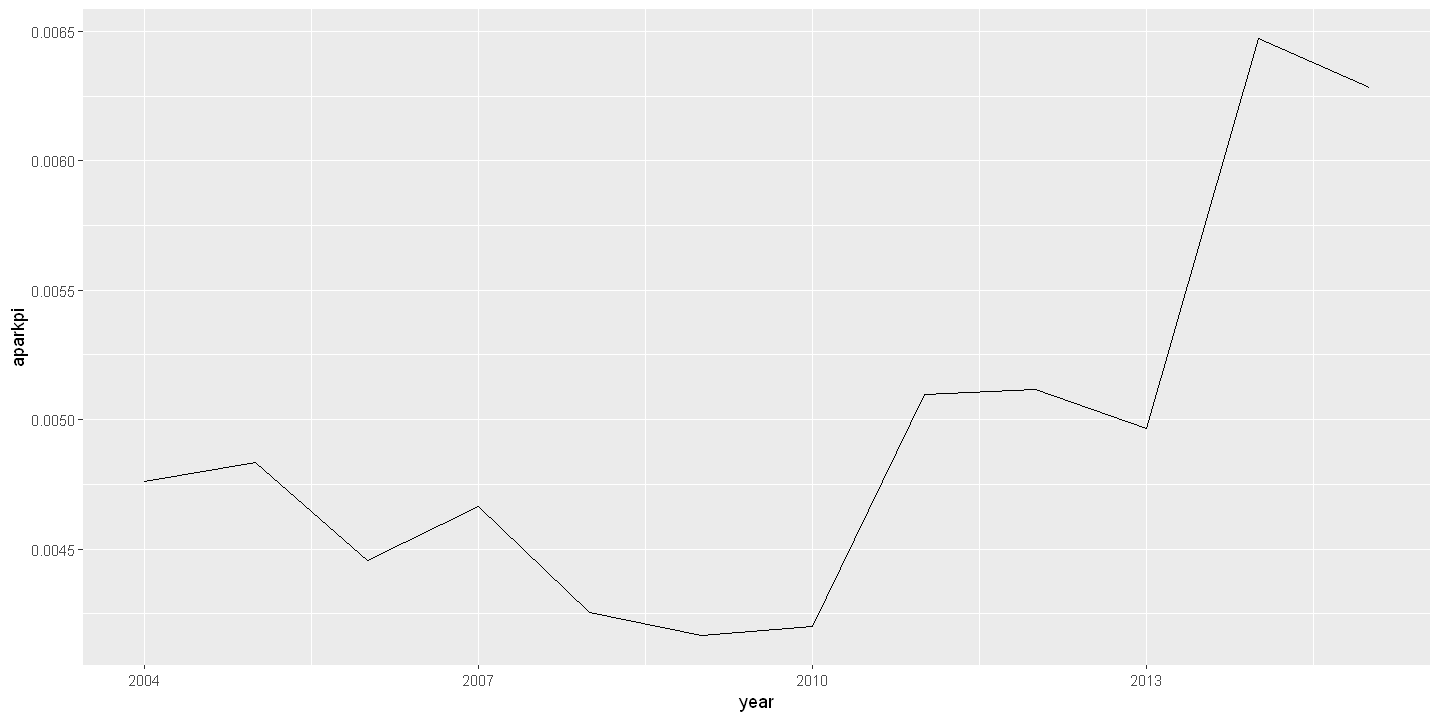

In [21]:
ggplot(state_spending %>% drop_na(aparkpi) %>% filter(st == 'ND'), aes(x = year, y = aparkpi)) + geom_line()

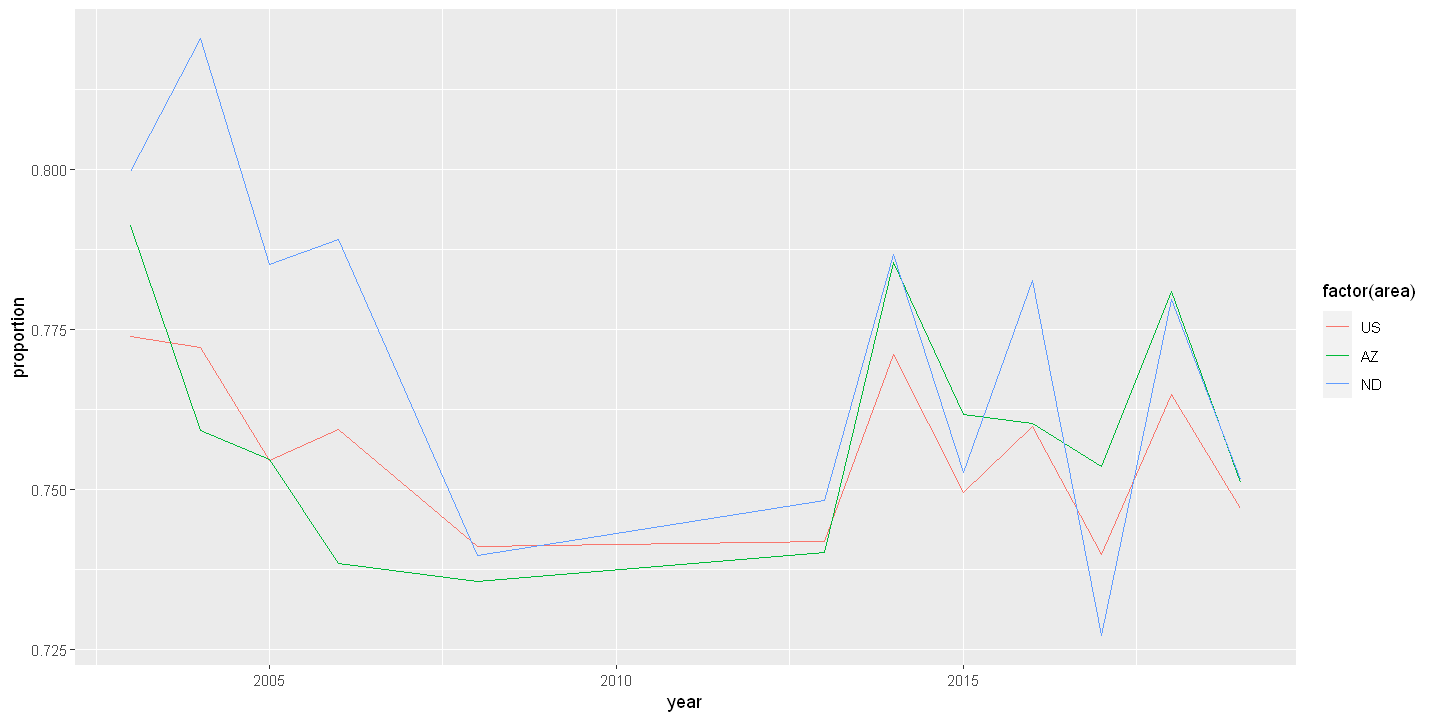

In [22]:
plot_df = brfss_table %>% filter(exercise < 9)
# ggplot(plot_df, aes(x = year, fill = factor(exercise))) + geom_bar(position = 'dodge')
counts_df = plot_df %>% count(year)
counts_df_AZ = plot_df %>% filter(state == 'AZ') %>% count(year)
counts_df_ND = plot_df %>% filter(state == 'ND') %>% count(year)

proportion_plot_df = rbind(
    data.frame(area = 'US', year = counts_df$year,
        proportion = sapply(counts_df$year, function(x) {nrow(plot_df %>% filter(year == x, exercise == 1))}) / counts_df$n),
    data.frame(area = 'AZ', year = counts_df_AZ$year,
        proportion = sapply(counts_df_AZ$year, function(x) {nrow(plot_df %>% filter(year == x, state == 'AZ', exercise == 1))}) / counts_df_AZ$n),
    data.frame(area = 'ND', year = counts_df_ND$year,
        proportion = sapply(counts_df_ND$year, function(x) {nrow(plot_df %>% filter(year == x, state == 'ND', exercise == 1))}) / counts_df_ND$n)
)

ggplot(proportion_plot_df, aes(x = year, y = proportion, color = factor(area))) + geom_line()

It is hard to say - if anything, there doesn't seem to be a significant difference in the trajectories for AZ and ND, as well as US in general. Low sample size could be an issue, and we also would expect interventions to have an effect after a time delay. For the project, a wider scan for multiple policies and multiple health behaviors using more proper models would need to be employed.

### Conclusion: in order to properly establish evidence of 'intervention' having an effect, a more proper model (for example, time-series logistic regression analysis) needs to be used. However, this exploratory analysis demonstrates the direction I'm planning to take this capstone project.